In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# load file (update path)
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.info()

Saving Cleaned-students_adaptability_level_online_education.csv to Cleaned-students_adaptability_level_online_education.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               256 non-null    object
 1   Age                  256 non-null    object
 2   Education Level      256 non-null    object
 3   Institution Type     256 non-null    object
 4   IT Student           256 non-null    object
 5   Location             256 non-null    object
 6   Load-shedding        256 non-null    object
 7   Financial Condition  256 non-null    object
 8   Internet Type        256 non-null    object
 9   Network Type         256 non-null    object
 10  Class Duration       256 non-null    object
 11  Self Lms             256 non-null    object
 12  Device               256 non-null    object
 13  Adaptivity Level     256 non-nu

Adaptivity Level
Moderate    46.09375
Low         44.53125
High         9.37500
Name: proportion, dtype: float64


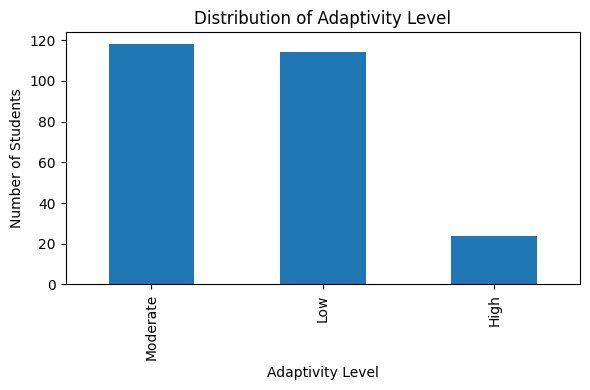

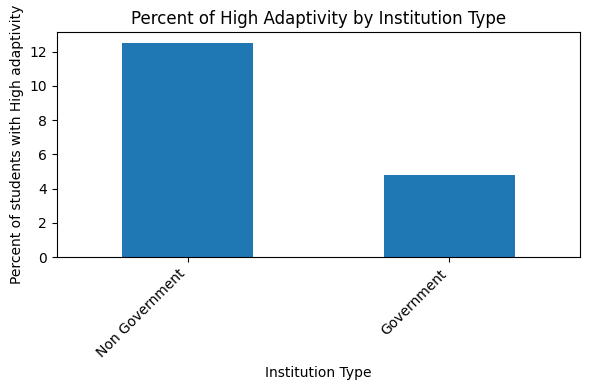

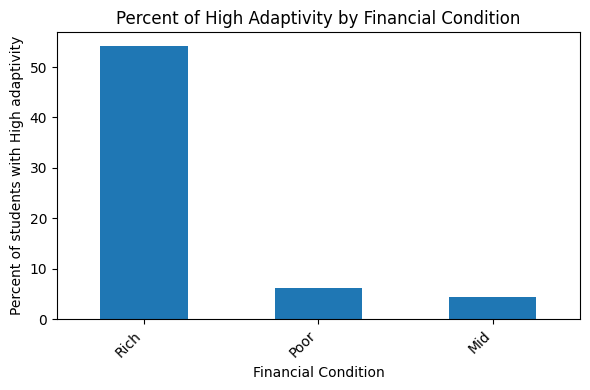

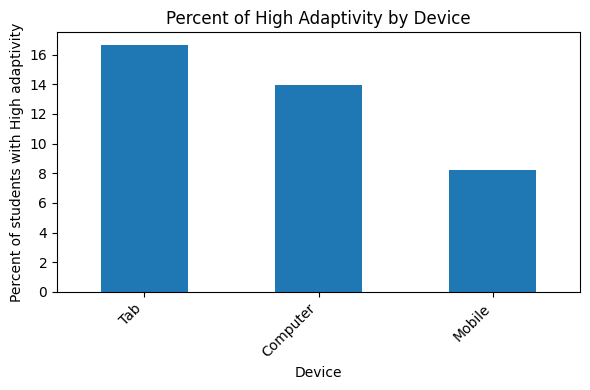

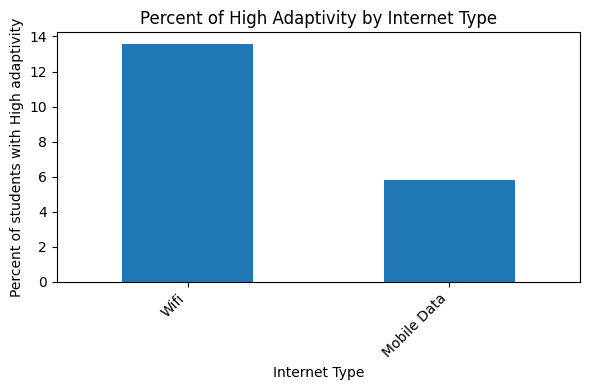

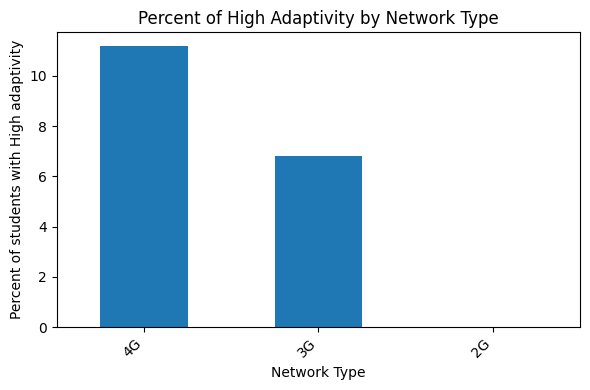

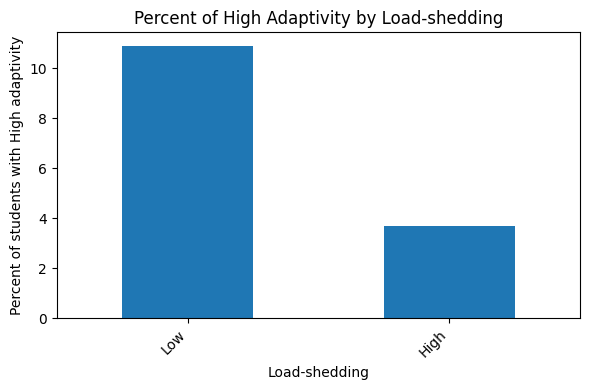

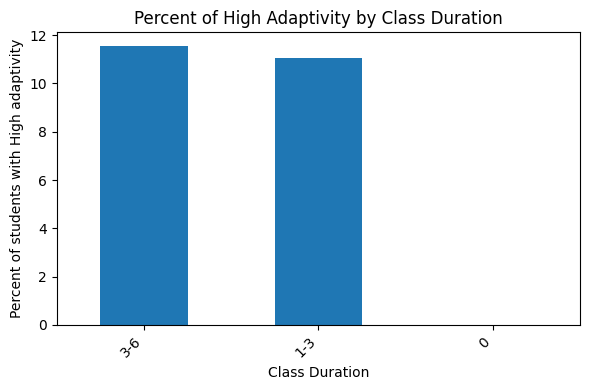

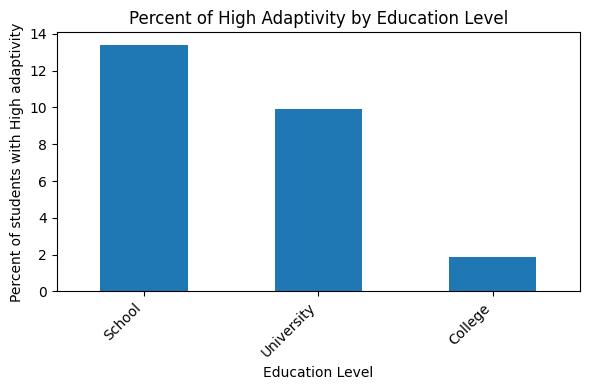

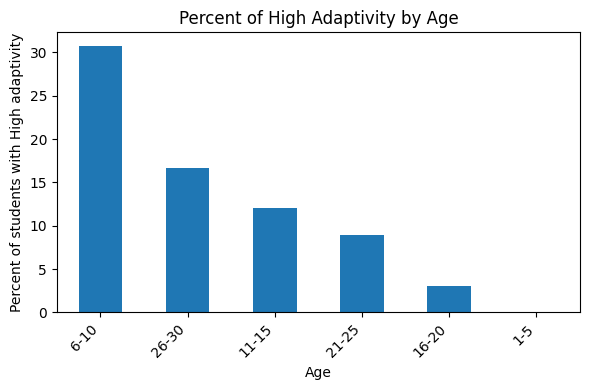

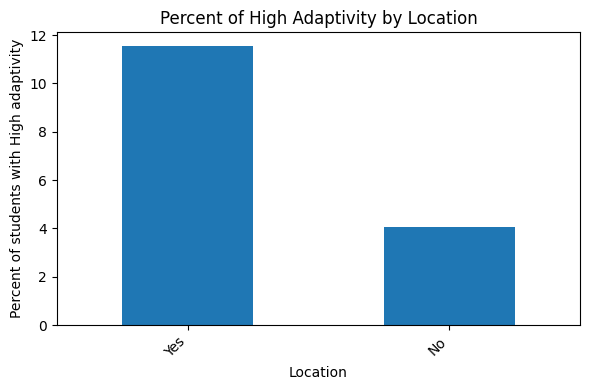

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

print(df["Adaptivity Level"].value_counts(normalize=True) * 100)

# 2. Overall distribution of Adaptivity Level
plt.figure(figsize=(6,4))
df["Adaptivity Level"].value_counts().plot(kind="bar")
plt.title("Distribution of Adaptivity Level")
plt.xlabel("Adaptivity Level")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

# Helper function: percent of "High" adaptivity within each category
def plot_high_share(column):
    counts = (
        df.groupby(column)["Adaptivity Level"]
          .value_counts(normalize=True)
          .unstack()
          .fillna(0)
    )
    if "High" in counts.columns:
        high_share = counts["High"] * 100
    else:
        high_share = pd.Series(0, index=counts.index)

    plt.figure(figsize=(6,4))
    high_share.sort_values(ascending=False).plot(kind="bar")
    plt.title(f"Percent of High Adaptivity by {column}")
    plt.xlabel(column)
    plt.ylabel("Percent of students with High adaptivity")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 3. High adaptivity by key variables
plot_high_share("Institution Type")
plot_high_share("Financial Condition")
plot_high_share("Device")
plot_high_share("Internet Type")
plot_high_share("Network Type")
plot_high_share("Load-shedding")
plot_high_share("Class Duration")
plot_high_share("Education Level")
plot_high_share("Age")
plot_high_share("Location")


###**Summary & Insights**
1. **Overall Adaptivity Levels**

- Most students fall into Low or Moderate adaptivity categories.

- Only around 9 percent of students demonstrate High adaptability.

- This indicates that online education remains challenging for the majority of learners in this sample.

2. **Key Factors Influencing High Adaptivity**
- A. Financial Condition — the strongest predictor

  - Students who identified as Rich showed over 50 percent High adaptivity.

  - Meanwhile, Poor and Mid financial groups showed very low High-adaptivity rates (4–6 percent).

**Insight:** Access to resources (stable internet, private study space, better devices) is a major determinant of adaptability.

- B. Device Type

  - Tablet and Computer users show the highest percentages of High adaptivity.

  - Mobile-only users show the lowest High-adaptivity rates.

**Insight:** Using a full computing device (desktop/tablet) gives students better online-learning conditions than relying on mobile phones.

- C. Internet Type

  - WiFi users are much more likely to have High adaptability compared to Mobile Data users.

**Insight:** Stable and continuous internet connectivity is essential for better engagement and adaptability.

- D. Network Type

  - 4G users show the highest High-adaptivity share.

**Insight:** Network speed and reliability directly influence students’ experience with online learning.

- E. Load-Shedding (Power Cuts)

- Students with Low load-shedding had nearly three times the High-adaptivity rate compared to those facing High load-shedding.

**Insight:** Unreliable electricity severely harms students’ ability to adapt to remote learning formats.

- F. Class Duration

Students attending 1–3 hours or 3–6 hours of online classes show roughly similar High-adaptivity levels.

**Insight:** Exposure to online classes is necessary; students cannot adapt without actual online learning experience.

3. **Factors With Minimal Influence**
- A. IT Student vs Non-IT Student

  - Almost no difference; IT background does not significantly affect adaptivity levels in this dataset.

- B. LMS Use

  - Students who use an LMS show slightly higher adaptability, but the difference is small.

- C. Gender

  - Adaptivity levels are consistent between male and female students.

- D. Location

  - Students in “better-connected/more resourced” areas show higher adaptability than those in disadvantaged areas, but the effect is moderate.

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df_enc = df.copy()
for col in df_enc.columns:
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col])

X = df_enc.drop("Adaptivity Level", axis=1)
y = df_enc["Adaptivity Level"]


# ============================
# TRAIN / TEST SPLIT
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# ============================
# 1. LINEAR REGRESSION
# ============================
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

lin_preds = np.round(lin_model.predict(X_test)).astype(int)
lin_acc = accuracy_score(y_test, lin_preds)

print("\n=== Linear Regression ===")
print("Accuracy:", lin_acc)
print(classification_report(y_test, lin_preds))


# ============================
# 2. RANDOM FOREST CLASSIFIER
# ============================
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print("\n=== Random Forest ===")
print("Accuracy:", rf_acc)
print(classification_report(y_test, rf_preds))


# ============================
# 3. LOGISTIC REGRESSION
# ============================
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)

print("\n=== Logistic Regression ===")
print("Accuracy:", log_acc)
print(classification_report(y_test, log_preds))


# ============================
# SUMMARY
# ============================
print("\n=== Summary of Model Accuracies ===")
print("Linear Regression:   ", lin_acc)
print("Random Forest:       ", rf_acc)
print("Logistic Regression: ", log_acc)




=== Linear Regression ===
Accuracy: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.52      0.91      0.66        34
           2       0.81      0.33      0.46        40

    accuracy                           0.57        77
   macro avg       0.44      0.41      0.37        77
weighted avg       0.65      0.57      0.53        77


=== Random Forest ===
Accuracy: 0.45454545454545453
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.48      0.47      0.48        34
           2       0.54      0.47      0.51        40

    accuracy                           0.45        77
   macro avg       0.34      0.32      0.33        77
weighted avg       0.50      0.45      0.47        77


=== Logistic Regression ===
Accuracy: 0.5844155844155844
              precision    recall  f1-score   support

           0    

**1. Logistic Regression** – Best Performance (58 percent accuracy)

Highest accuracy among the models.

Performs reasonably well on Moderate and High classes.

Fails to predict the Low class due to only 3 samples in the test set.

**2. Linear Regression** – Similar to Logistic Regression (57 percent accuracy)

Treating the target as an ordinal variable gives results close to Logistic Regression.

Strong recall for Moderate students (0.91) but weaker for High.

Also fails to identify the Low class.

3. Random Forest – Lowest Performance (45 percent accuracy)

Struggles with categorical, label-encoded features and small sample size.

Moderate performance on Moderate and High, but weaker than linear models.

Does not predict the Low class at all.